In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dataDir = '/home/jupyter/data'
sampleName = 'Sample_4774-DH-S1-D_CGCGGTAG-CAACATCC'

In [34]:
filePath = dataDir+"/"+sampleName+"/SpaceRanger/spatial/tissue_positions_list.csv"
print(filePath)

/home/jupyter/data/Sample_4774-DH-S1-D_CGCGGTAG-CAACATCC/SpaceRanger/spatial/tissue_positions_list.csv


In [35]:
tissue_pos = pd.read_csv(filePath, header=None, 
                         names=["barcode","in_tissue","array_row","array_col","pxl_row_in_fullres","pxl_col_in_fullres"])
tissue_pos.head()

,barcode,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
0,ACGCCTGACACGCGCT-1,0,0,0,3752,4280
1,TACCGATCCAACACTT-1,0,1,1,3915,4563
2,ATTAAAGCGGACGAGC-1,0,0,2,4077,4280
3,GATAAGGGACGATTAG-1,0,1,3,4240,4562
4,GTGCAAATCACCAATA-1,0,0,4,4402,4279


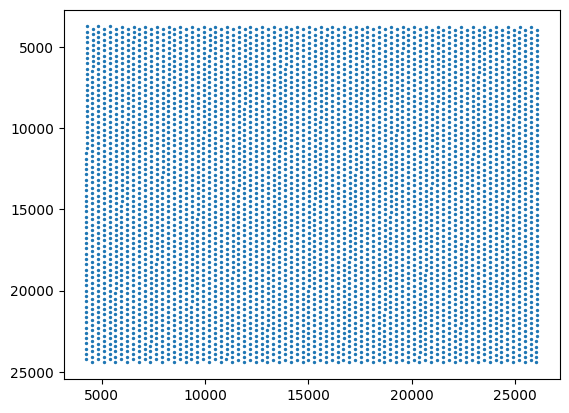

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = tissue_pos['pxl_col_in_fullres'], y = tissue_pos['pxl_row_in_fullres'], s=2)
ax.invert_yaxis()
plt.show()

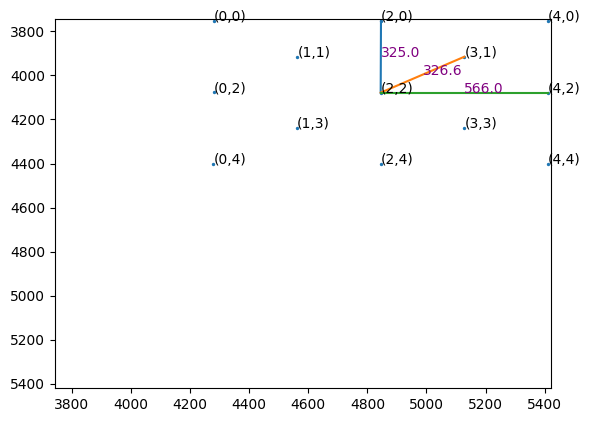

In [37]:
tissue_pos_tmp = tissue_pos.loc[tissue_pos['array_row'] < 5]
tissue_pos_tmp = tissue_pos_tmp.loc[tissue_pos['array_col'] < 5].reset_index(drop=True)

fig, ax = plt.subplots()
x_min = tissue_pos_tmp[['pxl_col_in_fullres','pxl_row_in_fullres']].min().min()
x_max = tissue_pos_tmp[['pxl_col_in_fullres','pxl_row_in_fullres']].max().max()
ax.set_xlim([x_min-10, x_max+10])
ax.set_ylim([x_min-10, x_max+10])
ax.scatter(x = tissue_pos_tmp['pxl_col_in_fullres'], y = tissue_pos_tmp['pxl_row_in_fullres'], s=2)
for i, r, c, x, y in tissue_pos_tmp[['array_row','array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres']].itertuples():
    ax.text(x, y, f"({r},{c})")

for r,c in [(2,0),(3,1),(4,2)]:
    p1 = tissue_pos_tmp.loc[(tissue_pos_tmp['array_row'] == r) & (tissue_pos_tmp['array_col'] == c), 
                                ['pxl_col_in_fullres', 'pxl_row_in_fullres']].to_numpy()[0]
    p2 = tissue_pos_tmp.loc[(tissue_pos_tmp['array_row'] == 2) & (tissue_pos_tmp['array_col'] == 2),
                                ['pxl_col_in_fullres', 'pxl_row_in_fullres']].to_numpy()[0]
    x1, y1 = p1
    x2, y2 = p2
    ax.plot([x1,x2],[y1,y2],'-')

    d = np.linalg.norm(p1 - p2)
    p1pt5 = (p1+p2)/2
    x1pt5, y1pt5 = p1pt5
    ax.text(x1pt5, y1pt5, np.round(d,1), color='purple')
    
ax.invert_yaxis()
plt.show()

In [38]:
# take 27.5% of distance
print(f"Radius: {326 * 0.275}")

Radius: 89.65
